In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
bank_data=pd.read_csv("bankruptcy-prevention.csv",sep=";",header=0)
bank_data

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


# Data Cleaning & Preprocessing

In [4]:
bank_data.shape

(250, 7)

In [5]:
# Checking information about the DataFrame

bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   industrial_risk         250 non-null    float64
 1    management_risk        250 non-null    float64
 2    financial_flexibility  250 non-null    float64
 3    credibility            250 non-null    float64
 4    competitiveness        250 non-null    float64
 5    operating_risk         250 non-null    float64
 6    class                  250 non-null    object 
dtypes: float64(6), object(1)
memory usage: 13.8+ KB


In [6]:
# Checking the missing values

bank_data.isnull().sum()

industrial_risk           0
 management_risk          0
 financial_flexibility    0
 credibility              0
 competitiveness          0
 operating_risk           0
 class                    0
dtype: int64

In [7]:
bank_data.columns

Index(['industrial_risk', ' management_risk', ' financial_flexibility',
       ' credibility', ' competitiveness', ' operating_risk', ' class'],
      dtype='object')

In [8]:
# Convert the dictionary into DataFrame

bank_data_new = pd.DataFrame(bank_data)

In [9]:
# renaming some columns name as there is presence of space before name

bank_data_new.rename(columns = {' management_risk':'management_risk',' financial_flexibility':'financial_flexibility',' credibility':'credibility',' competitiveness':'competitiveness',' operating_risk':'operating_risk',' class':'class'}, inplace = True)

In [10]:
bank_data_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [11]:
# Value count for all columns

for i in bank_data_new.columns:
    print(i,":")
    print(bank_data_new[i].value_counts())
    print(" ")

industrial_risk :
industrial_risk
1.0    89
0.5    81
0.0    80
Name: count, dtype: int64
 
management_risk :
management_risk
1.0    119
0.5     69
0.0     62
Name: count, dtype: int64
 
financial_flexibility :
financial_flexibility
0.0    119
0.5     74
1.0     57
Name: count, dtype: int64
 
credibility :
credibility
0.0    94
1.0    79
0.5    77
Name: count, dtype: int64
 
competitiveness :
competitiveness
0.0    103
1.0     91
0.5     56
Name: count, dtype: int64
 
operating_risk :
operating_risk
1.0    114
0.0     79
0.5     57
Name: count, dtype: int64
 
class :
class
non-bankruptcy    143
bankruptcy        107
Name: count, dtype: int64
 


In [12]:
# Convert datatype object to category

bank_data_new["class"]=bank_data_new["class"].astype("category")
bank_data_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,bankruptcy
1,0.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
2,1.0,0.0,0.0,0.0,0.0,1.0,bankruptcy
3,0.5,0.0,0.0,0.5,0.0,1.0,bankruptcy
4,1.0,1.0,0.0,0.0,0.0,1.0,bankruptcy
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,non-bankruptcy
246,1.0,1.0,0.5,1.0,1.0,0.0,non-bankruptcy
247,0.0,1.0,1.0,0.5,0.5,0.0,non-bankruptcy
248,1.0,0.0,0.5,1.0,0.5,0.0,non-bankruptcy


In [13]:
# Convert class into binary " bankruptcy = 0 & non-bankruptcy = 1 "

bank_data_new['class'] = bank_data_new['class'].cat.codes
bank_data_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
0,0.5,1.0,0.0,0.0,0.0,0.5,0
1,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.5,0.0,0.0,0.5,0.0,1.0,0
4,1.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1
246,1.0,1.0,0.5,1.0,1.0,0.0,1
247,0.0,1.0,1.0,0.5,0.5,0.0,1
248,1.0,0.0,0.5,1.0,0.5,0.0,1


In [14]:
bank_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   industrial_risk        250 non-null    float64
 1   management_risk        250 non-null    float64
 2   financial_flexibility  250 non-null    float64
 3   credibility            250 non-null    float64
 4   competitiveness        250 non-null    float64
 5   operating_risk         250 non-null    float64
 6   class                  250 non-null    int8   
dtypes: float64(6), int8(1)
memory usage: 12.1 KB


In [15]:
bank_data_new.describe()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
count,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000,250.000000
mean,0.518000,0.614000,0.376000,0.470000,0.476000,0.570000,0.572000
std,0.411526,0.410705,0.401583,0.415682,0.440682,0.434575,0.495781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.000000
75%,1.000000,1.000000,0.500000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# EDA

In [16]:
# Checking the pairwise correlation of all the columns in the DataFrame

bank_data_new.corr()

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class
industrial_risk,1.000000,0.255127,-0.162624,-0.014438,-0.257814,0.144507,-0.227823
management_risk,0.255127,1.000000,-0.254845,-0.303341,-0.306568,0.213874,-0.370838
financial_flexibility,-0.162624,-0.254845,1.000000,0.524951,0.686612,-0.116903,0.751020
credibility,-0.014438,-0.303341,0.524951,1.000000,0.675689,-0.288458,0.755909
competitiveness,-0.257814,-0.306568,0.686612,0.675689,1.000000,-0.211383,0.899452
operating_risk,0.144507,0.213874,-0.116903,-0.288458,-0.211383,1.000000,-0.279786
class,-0.227823,-0.370838,0.751020,0.755909,0.899452,-0.279786,1.000000


<Axes: >

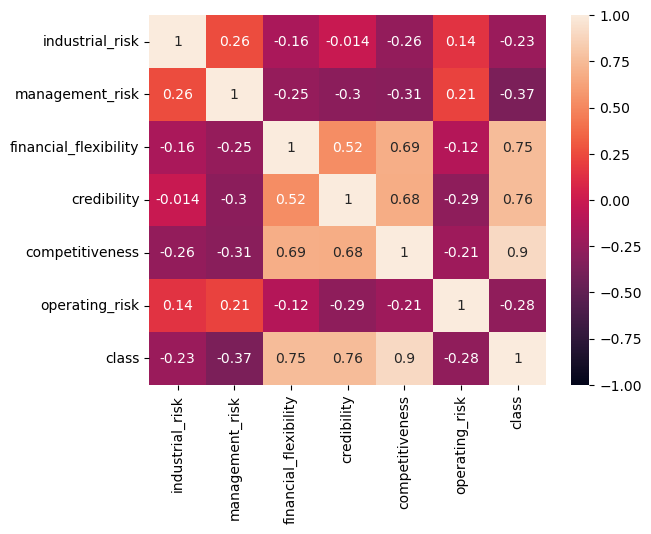

In [17]:
# Visualizing correlation

sns.heatmap(bank_data_new.corr(),vmin = -1,vmax = 1,annot = True)

# Here we can see 'Competitiveness' is the variable with the highest correlation.


In [18]:
# Univariate Analysis

grouped_data = bank_data_new.groupby('class')
group_means = grouped_data.mean()
group_means

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk
class,,,,,,
0,0.626168,0.789720,0.028037,0.107477,0.018692,0.710280
1,0.437063,0.482517,0.636364,0.741259,0.818182,0.465035


<Axes: xlabel='class'>

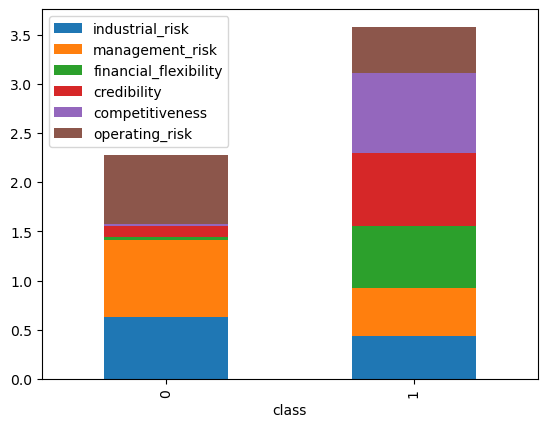

In [19]:
group_means.plot(kind='bar', stacked=True)

      # By looking at this we can say where there is management risk, there are moderate chances of bankruptcy

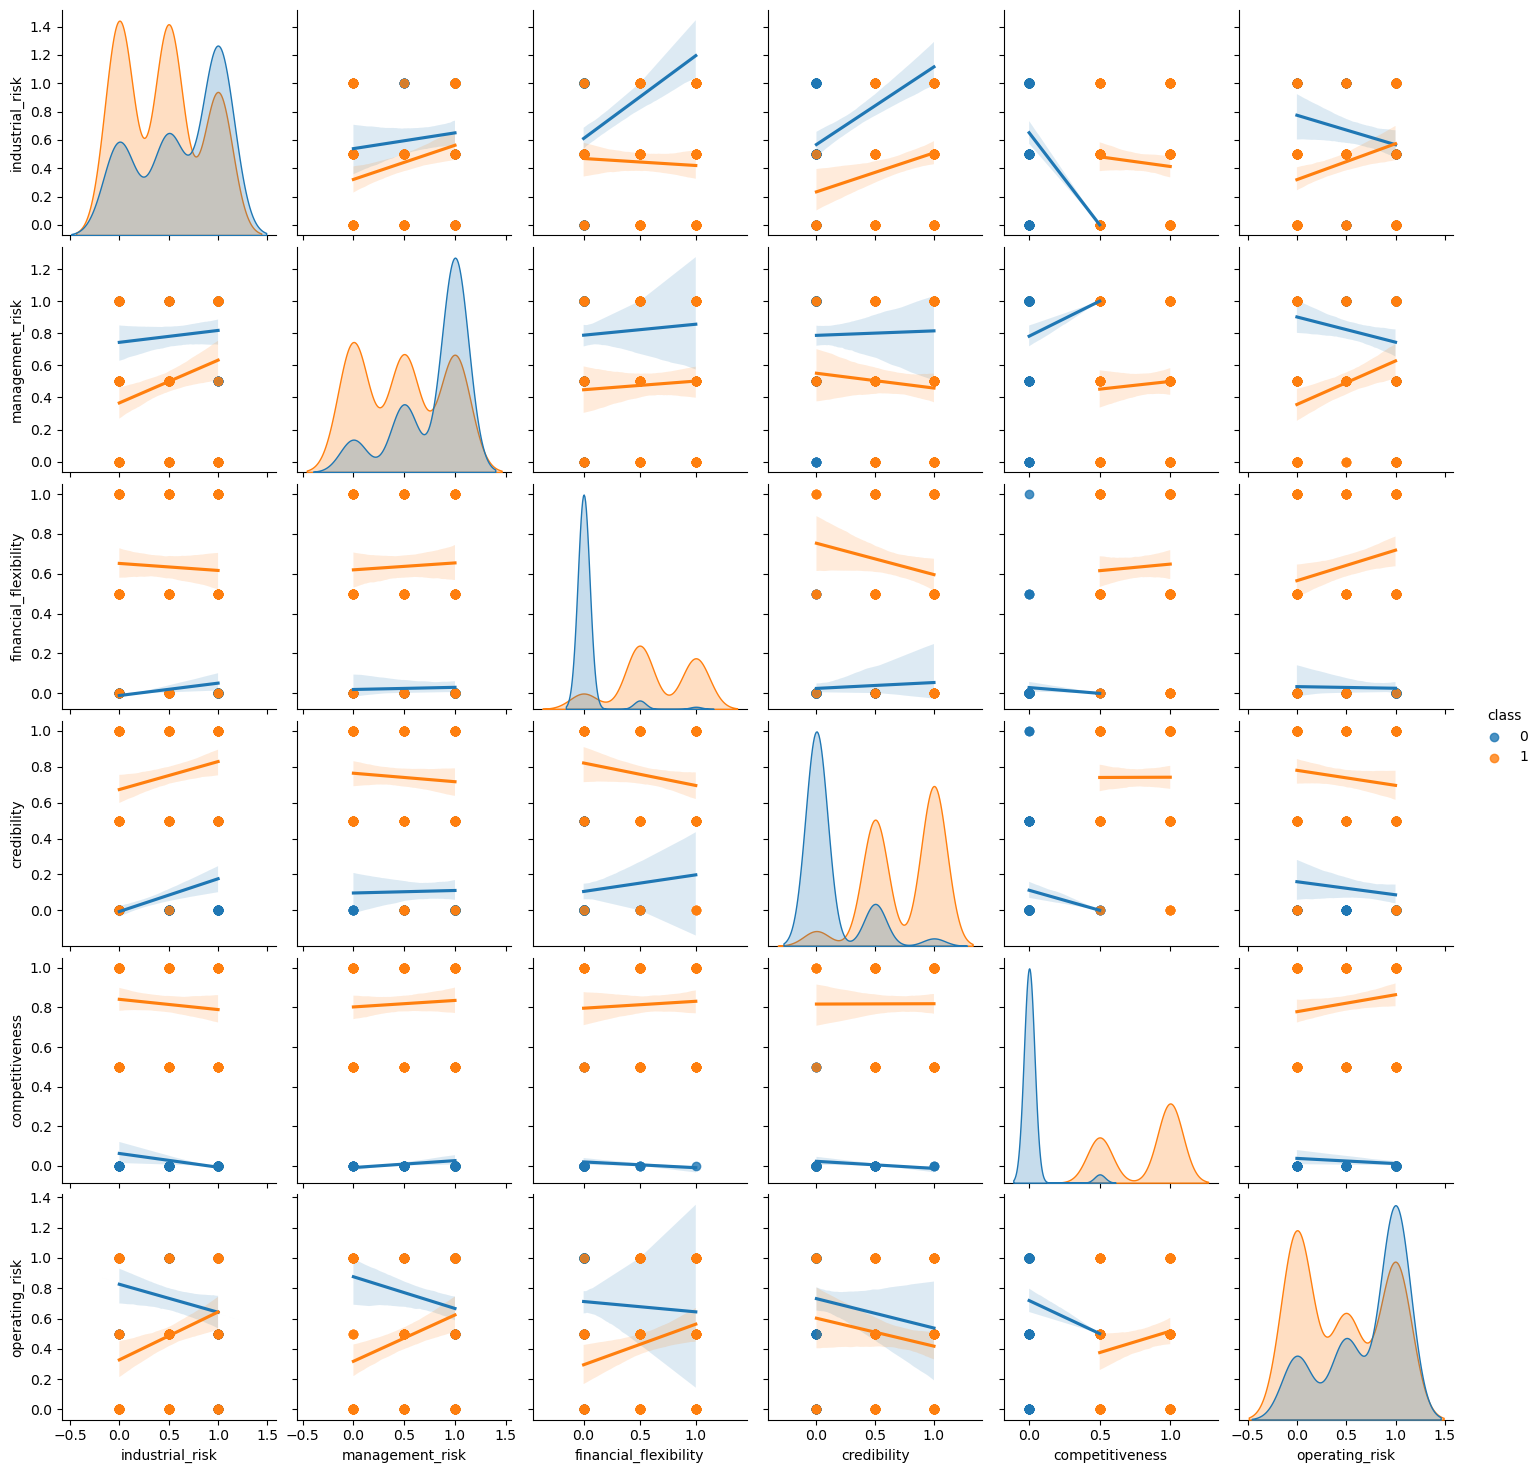

In [20]:
# Visualizing correlation using pairplot

plt.style.use("default")
sns.pairplot(bank_data_new, hue="class",kind='reg')

# From above pairplot visualization we found
    when less industrial risk is there, there is low chances of bankruptcy.

    When management risk is high then the chance of bankruptcy is also high.

    The bank which has less financial flexibility, the chances of bankruptcy is very high.

    Also for low credibility the chances of bankruptcy is very high.

    If the risk of competitiveness is very high then there is no chance of bankruptcy or we can say no competitiveness means yes to bankruptcy.

    High operating risk means high chance of bankruptcy.


In [21]:
# Value counts for 'class' column

bank_data_new["class"].value_counts()

class
1    143
0    107
Name: count, dtype: int64

<Axes: xlabel='class', ylabel='count'>

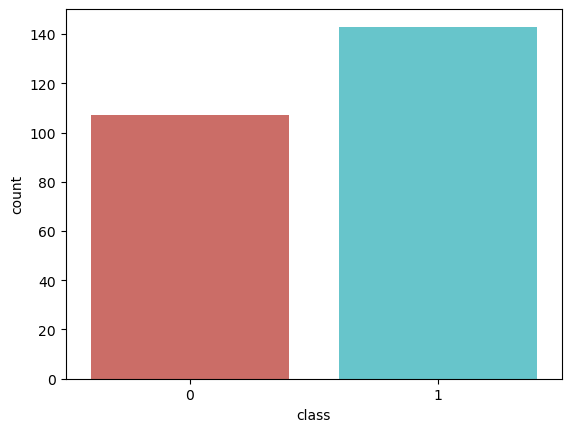

In [22]:
# Count plot for 'class' column

sns.countplot(x='class', data=bank_data_new, palette='hls')

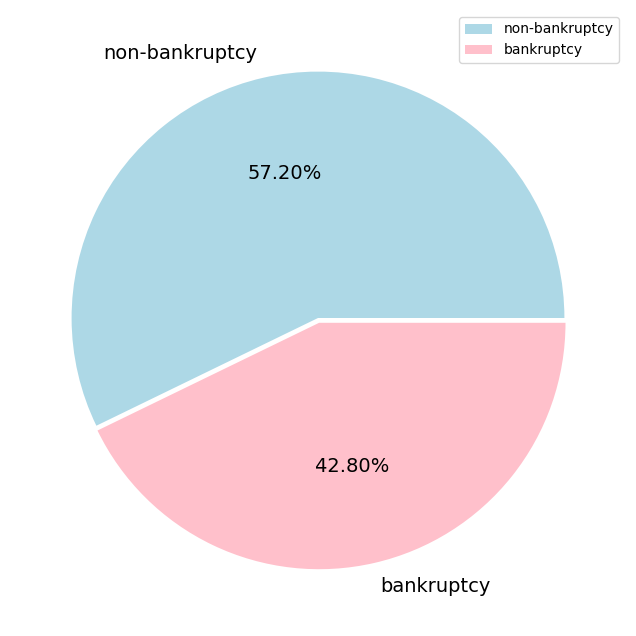

In [23]:
# Visualizing for 'class' column using pie chart

plt.figure(figsize=(8,8))
plt.pie(bank_data_new['class'].value_counts(), labels= ['non-bankruptcy','bankruptcy'], autopct= '%.2f%%',
        colors= ["lightblue","pink"], explode= [0,0.02], textprops= {'fontsize':14})
plt.legend(loc='best')
plt.show()

# Visualizing Count Plot for all Independent features

In [24]:
ind_features = bank_data_new.describe(include=["float64"]).columns
ind_features

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk'],
      dtype='object')

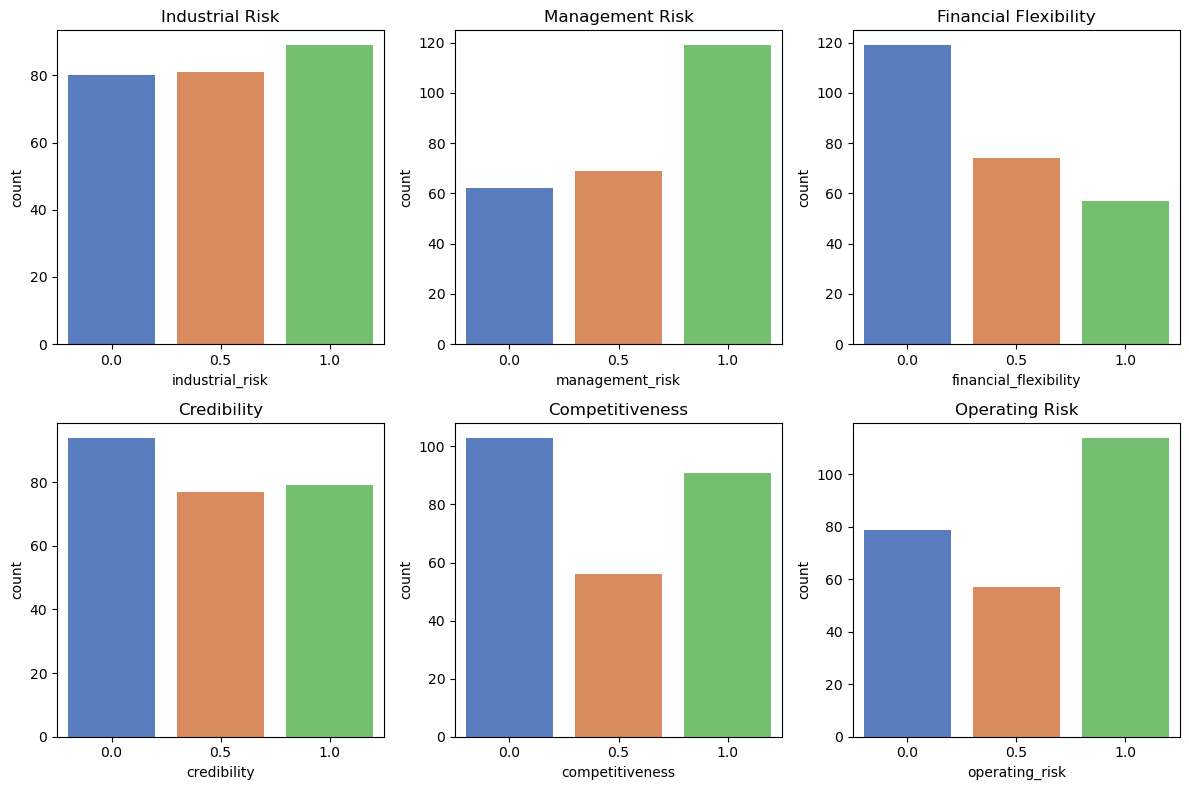

In [25]:
sns.set_palette("muted")

plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
sns.countplot(x='industrial_risk', data=bank_data_new)
plt.title('Industrial Risk')

plt.subplot(2, 3, 2)
sns.countplot(x='management_risk', data=bank_data_new)
plt.title('Management Risk')

plt.subplot(2, 3, 3)
sns.countplot(x='financial_flexibility', data=bank_data_new)
plt.title('Financial Flexibility')

plt.subplot(2, 3, 4)
sns.countplot(x='credibility', data=bank_data_new)
plt.title('Credibility')

plt.subplot(2, 3, 5)
sns.countplot(x='competitiveness', data=bank_data_new)
plt.title('Competitiveness')

plt.subplot(2, 3, 6)
sns.countplot(x='operating_risk', data=bank_data_new)
plt.title('Operating Risk')

plt.tight_layout()
plt.show()

# Comparing all Independent features With Class Column

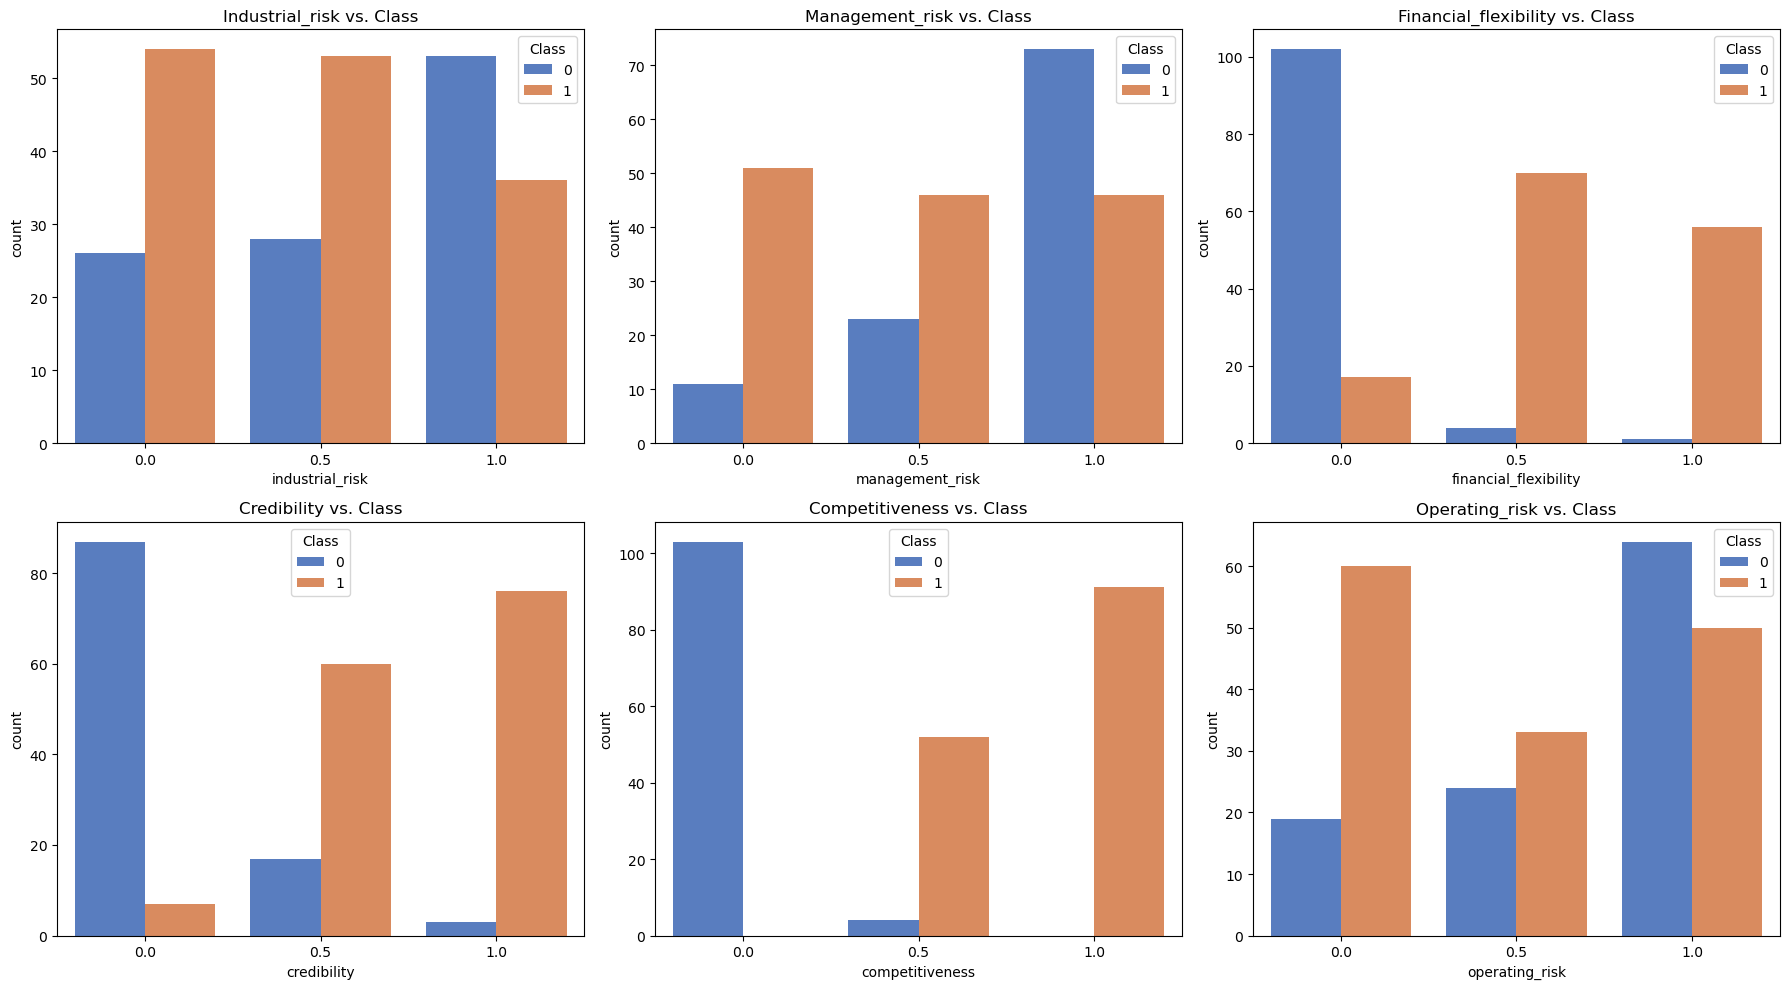

In [26]:
sns.set_palette("muted")
plt.figure(figsize=(18, 10))
risk_factors = ['industrial_risk', 'management_risk', 'financial_flexibility', 'credibility', 'competitiveness', 'operating_risk'] # list of risk factors

for i, factor in enumerate(risk_factors, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=factor, hue='class', data=bank_data_new)
    plt.title(f'{factor.capitalize()} vs. Class')
    plt.legend(title='Class')

plt.tight_layout()
plt.show()

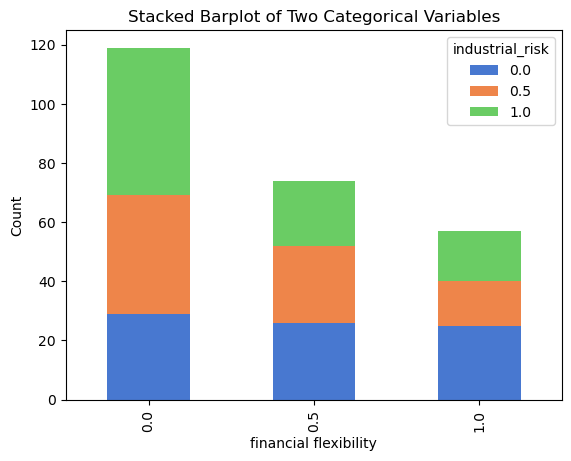

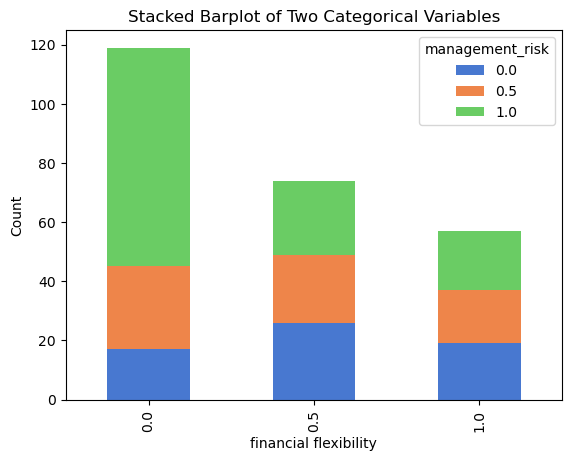

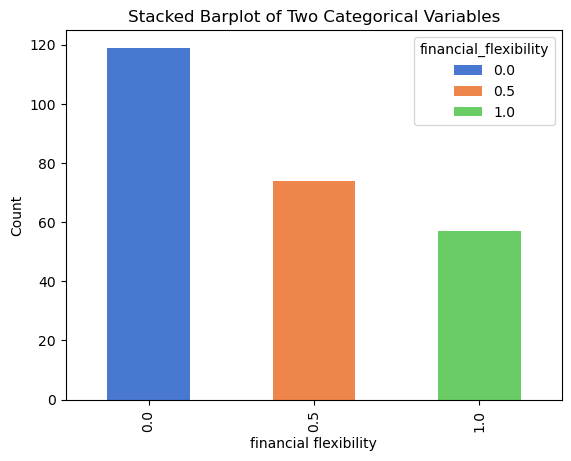

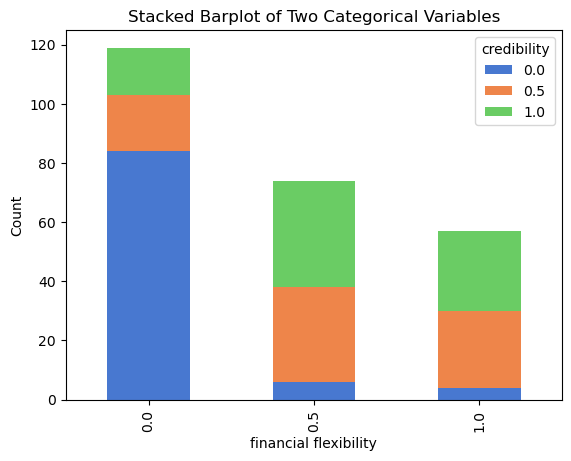

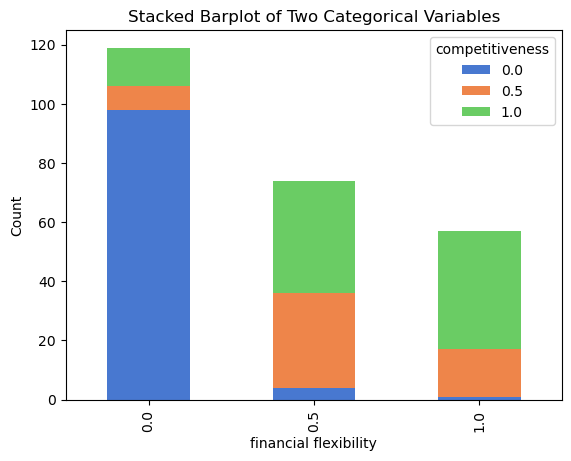

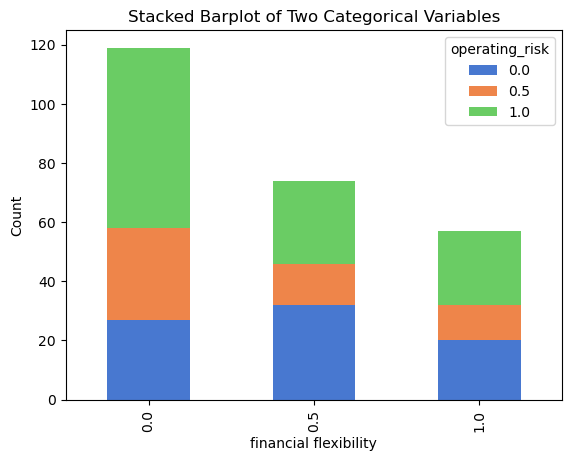

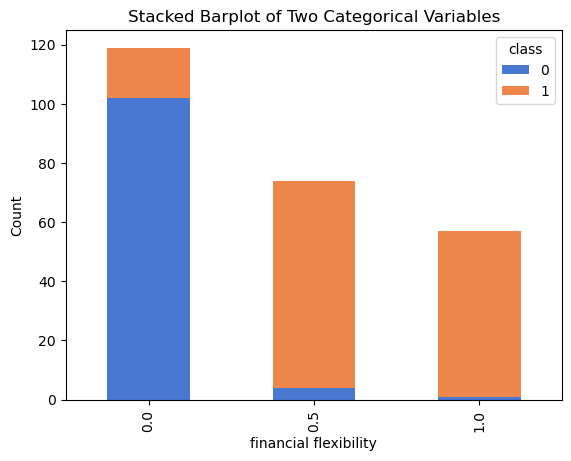

In [27]:
#Comparing all the other variables with 'financial_flexibility'

for i in bank_data_new.columns:
    pd.crosstab(bank_data_new['financial_flexibility'], bank_data_new[i]).plot(kind='bar', stacked=True)
    plt.xlabel('financial flexibility')
    plt.ylabel('Count')
    plt.title('Stacked Barplot of Two Categorical Variables')
    plt.show()


    # When industrial risk is there, financial flexibility is not there.
    # When management risk is there financial flexibility is not there.
    # When credibility is not there, financial flexibility is also not there.
    # Competitiveness os all the banks depends highly on the financial flexibility.
    # High operating risk can lead to risk in financial flexibility.
    # Ultimately, the bank which has more financial flexibility, has got very less chances of bankruptcy.

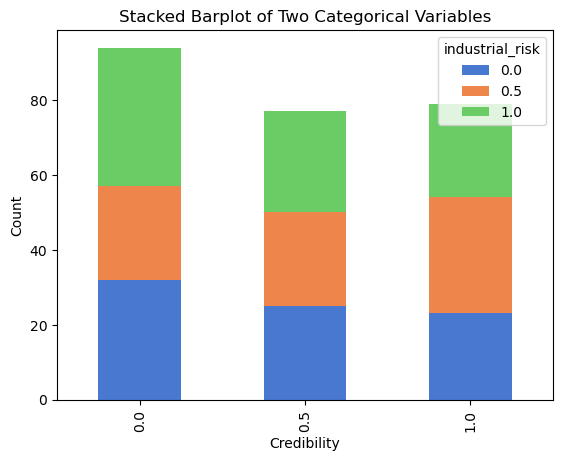

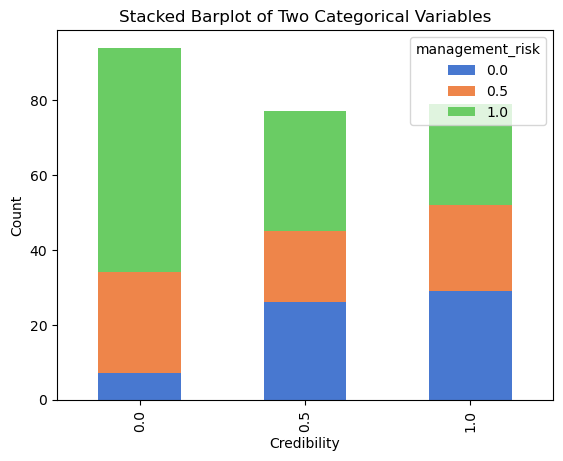

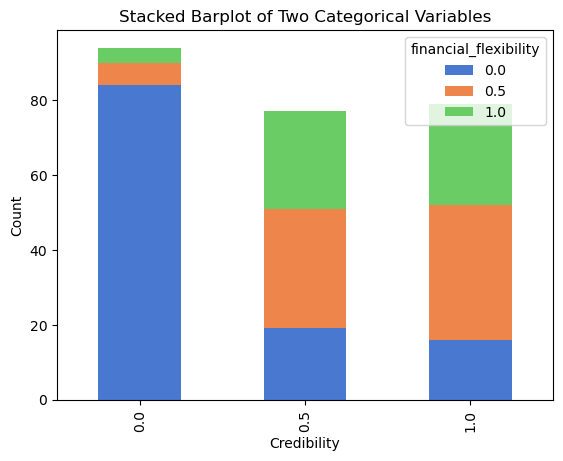

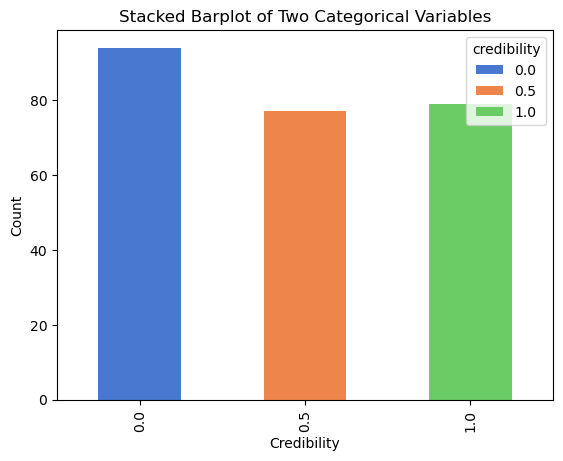

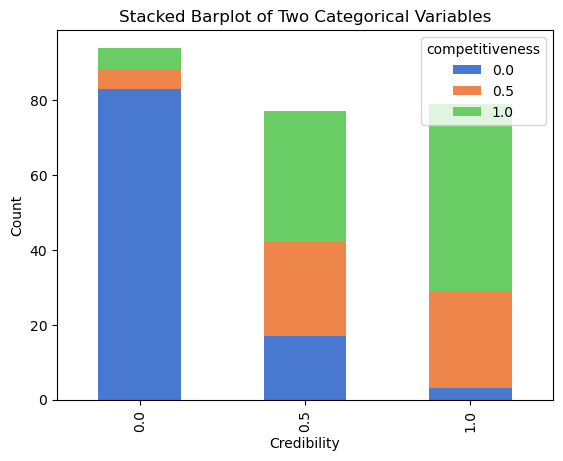

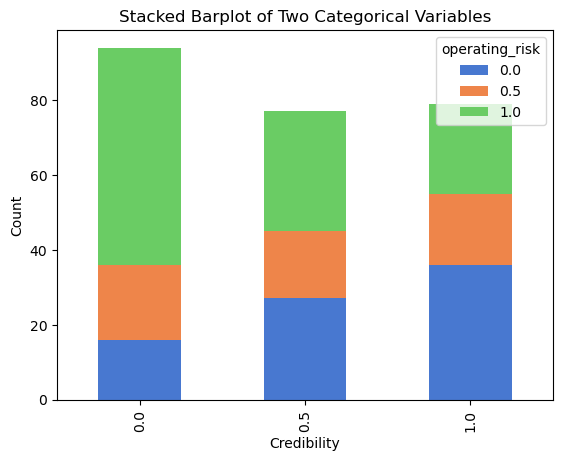

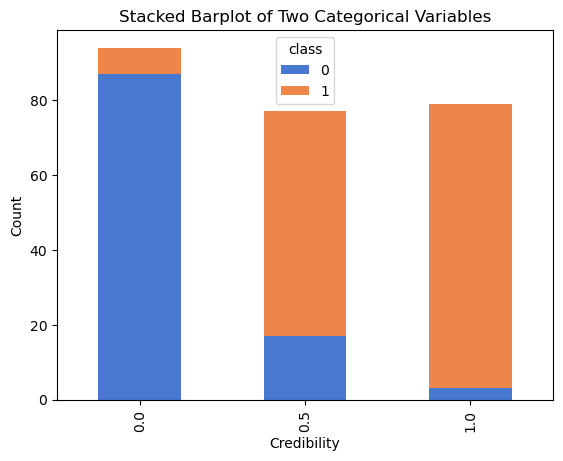

In [28]:
#Comparing all the other variables with 'credibility'

for i in bank_data_new.columns:
    pd.crosstab(bank_data_new['credibility'], bank_data_new[i]).plot(kind='bar', stacked=True)
    plt.xlabel('Credibility')
    plt.ylabel('Count')
    plt.title('Stacked Barplot of Two Categorical Variables')
    plt.show()

#
     # Low credibility indicates high industrial risk
     # Low credibility indicates very low financial flexibility
     # Low credibility means very low competitiveness
     # Ultimately low credibility means high chances of bankruptcy

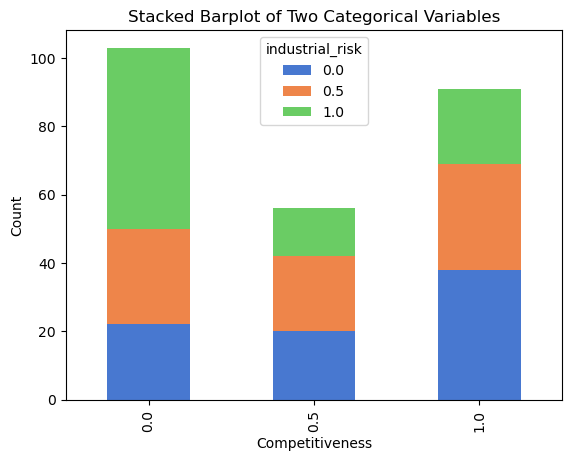

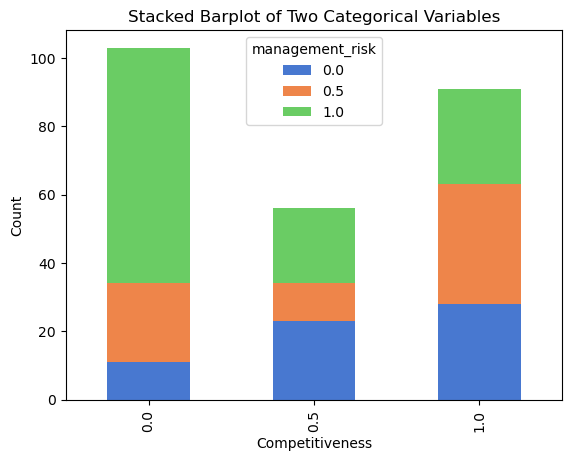

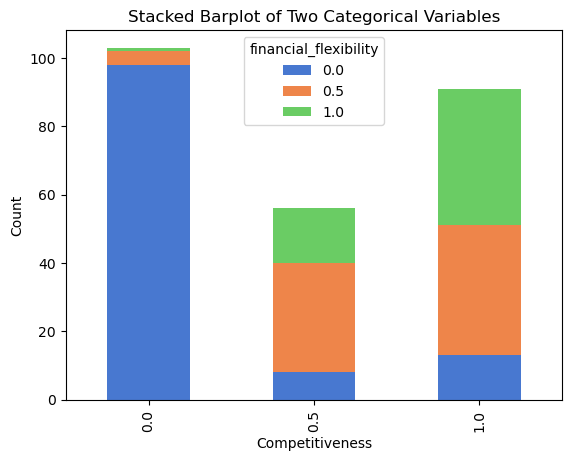

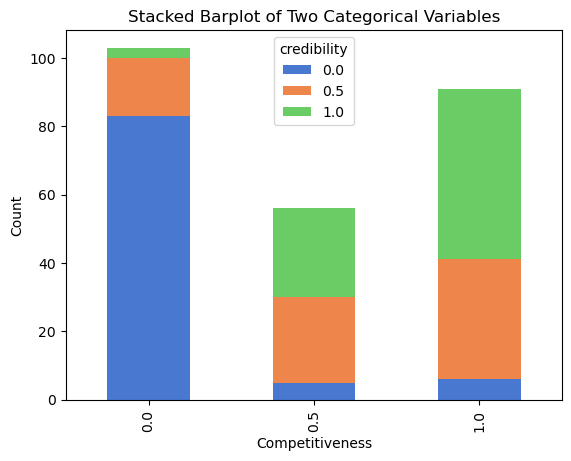

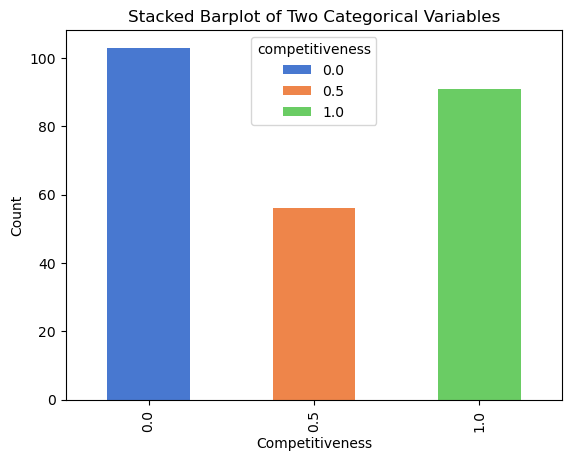

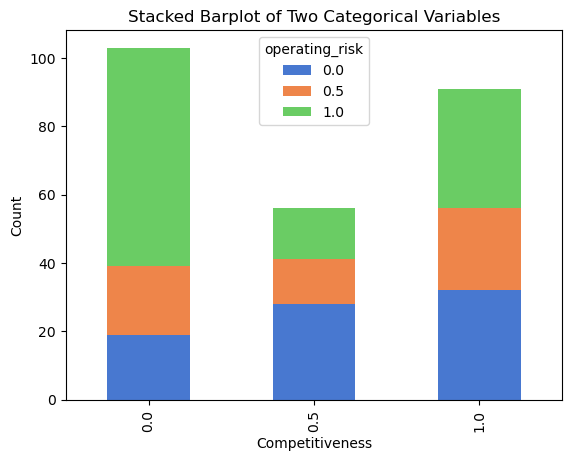

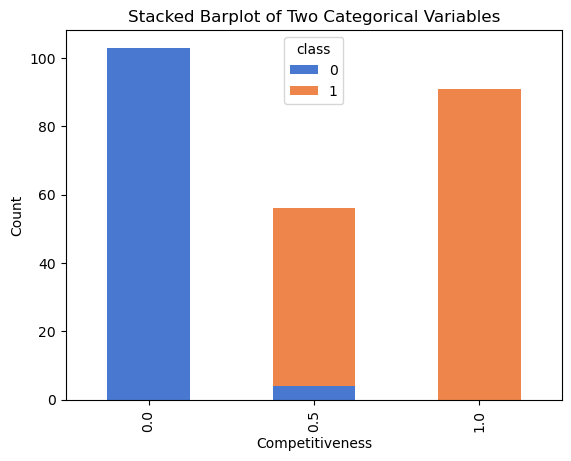

In [29]:
#Comparing all the other variables with 'competitiveness'

for i in bank_data_new.columns:
    pd.crosstab(bank_data_new['competitiveness'], bank_data_new[i]).plot(kind='bar', stacked=True)
    plt.xlabel('Competitiveness')
    plt.ylabel('Count')
    plt.title('Stacked Barplot of Two Categorical Variables')
    plt.show()

    
    
      # More operating risk less competitiveness
      # No competitiveness, yes to bankruptcy

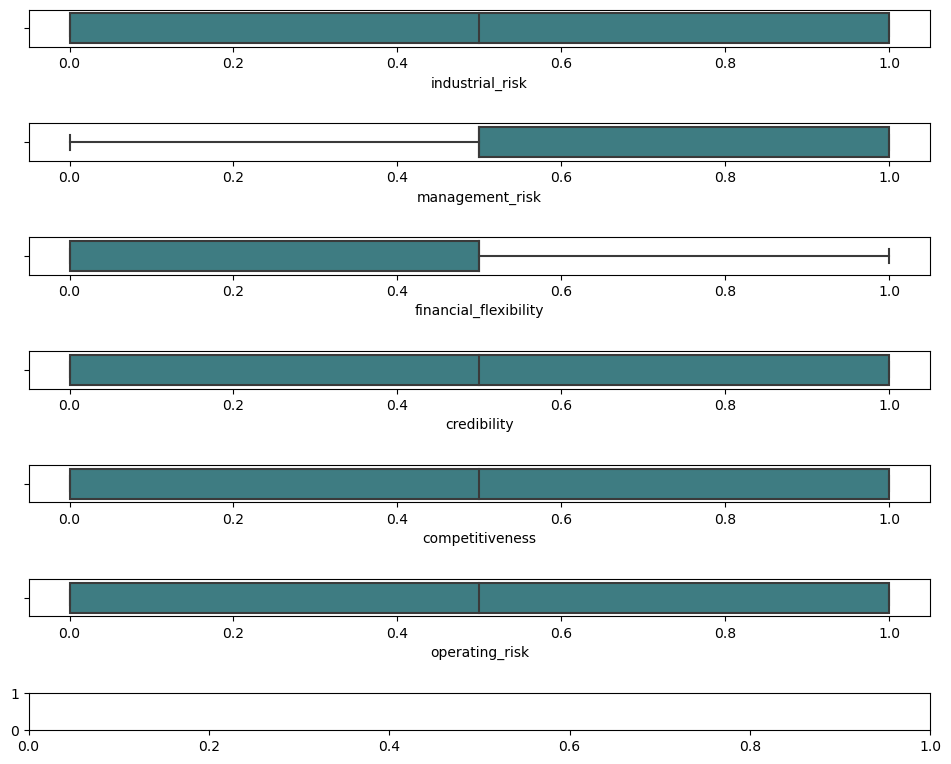

In [30]:
# Outlier detection

outlier = bank_data_new.copy() 
fig, axes = plt.subplots(7,1,figsize=(10,8), sharex=False, sharey=False)
sns.boxplot(x='industrial_risk',data=outlier,palette='crest',ax=axes[0])
sns.boxplot(x='management_risk',data=outlier,palette='crest',ax=axes[1])
sns.boxplot(x='financial_flexibility',data=outlier,palette='crest',ax=axes[2])
sns.boxplot(x='credibility',data=outlier,palette='crest',ax=axes[3])
sns.boxplot(x='competitiveness',data=outlier,palette='crest',ax=axes[4])
sns.boxplot(x='operating_risk',data=outlier,palette='crest',ax=axes[5])
plt.tight_layout(pad=2.0)

    > We can see that no outliers are present

# Model Building

In [31]:
x = bank_data_new.drop('class', axis=1)
y = bank_data_new[['class']]

# 1. Logistic Regression

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,f1_score,confusion_matrix,roc_auc_score,roc_curve

In [33]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [34]:
lr_model=LogisticRegression()
lr_model.fit(x_train,y_train)

LogisticRegression()

In [35]:
lr_model.coef_

array([[-0.43044914, -0.73309162,  2.37729553,  2.31022854,  3.68601327,
        -0.53101906]])

In [36]:
lr_model.intercept_

array([-1.97280206])

In [37]:
pred=lr_model.predict(x_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        37

    accuracy                           1.00        63
   macro avg       1.00      1.00      1.00        63
weighted avg       1.00      1.00      1.00        63



In [38]:
confusion_lr = confusion_matrix(y_test, pred)

confusion_lr

array([[26,  0],
       [ 0, 37]], dtype=int64)

In [39]:
#Compare the train-set and test-set accuracy
#Check for overfitting and underfitting (the scores on training and test set)

print('Training set score : {:.2f}%'.format(lr_model.score(x_train, y_train)*100))
print('Test set score     : {:.2f}%'.format(lr_model.score(x_test, y_test)*100))

Training set score : 99.47%
Test set score     : 100.00%


# From the accuracy we can say that the model is overfitted, to avoid overfitting problem we are going to use Feature Engineering method

In [40]:
#Introducing new feature 'bankruptcy_risk' which all together takes the value of 'competitiveness','credibility','financial_flexibility'
bank_data_new['bankruptcy_risk'] = bank_data_new['competitiveness'] * bank_data_new['credibility'] * bank_data_new['financial_flexibility']

In [41]:
bank_data_new

,industrial_risk,management_risk,financial_flexibility,credibility,competitiveness,operating_risk,class,bankruptcy_risk
0,0.5,1.0,0.0,0.0,0.0,0.5,0,0.00
1,0.0,1.0,0.0,0.0,0.0,1.0,0,0.00
2,1.0,0.0,0.0,0.0,0.0,1.0,0,0.00
3,0.5,0.0,0.0,0.5,0.0,1.0,0,0.00
4,1.0,1.0,0.0,0.0,0.0,1.0,0,0.00
...,...,...,...,...,...,...,...,...
245,0.0,1.0,1.0,1.0,1.0,1.0,1,1.00
246,1.0,1.0,0.5,1.0,1.0,0.0,1,0.50
247,0.0,1.0,1.0,0.5,0.5,0.0,1,0.25
248,1.0,0.0,0.5,1.0,0.5,0.0,1,0.25


In [42]:
bank_data_new.columns

Index(['industrial_risk', 'management_risk', 'financial_flexibility',
       'credibility', 'competitiveness', 'operating_risk', 'class',
       'bankruptcy_risk'],
      dtype='object')

In [43]:
#Dropping 'credibility' and 'comprtitiveness' since 'bankruptcy_risk' already includes its features"

X = bank_data_new.drop(['class','credibility','competitiveness'], axis=1)
Y = bank_data_new['class']

In [44]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [45]:
model = LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [46]:
y_pred_train = model.predict(X_train)

In [47]:
#Accuracy score

print(metrics.accuracy_score(Y_train, y_pred_train))

0.9314285714285714


In [48]:
#Classification report

print(classification_report(Y_train, y_pred_train ))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93        76
           1       0.99      0.89      0.94        99

    accuracy                           0.93       175
   macro avg       0.93      0.94      0.93       175
weighted avg       0.94      0.93      0.93       175



# 2. Decisison Tree

In [49]:
from sklearn.tree import  DecisionTreeClassifier

# 
Using Gini Method

In [50]:
# Gini

dt_model1 = DecisionTreeClassifier(max_depth=10,criterion = 'gini')

In [51]:
dt_model1.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=10)

In [52]:
dt_pred_train = dt_model1.predict(X_train)

In [53]:
#Accuracy score

print(metrics.accuracy_score(Y_train, dt_pred_train))

0.9657142857142857


In [54]:
#Classification report

print(classification_report(Y_train, dt_pred_train ))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        76
           1       1.00      0.94      0.97        99

    accuracy                           0.97       175
   macro avg       0.96      0.97      0.97       175
weighted avg       0.97      0.97      0.97       175



#
Using Entropy Method

In [55]:
# Entropy

dt_model2 = DecisionTreeClassifier(max_depth=10,criterion = 'entropy')

In [56]:
dt_model2.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10)

In [57]:
dt_pred_train2 = dt_model2.predict(X_train)

In [58]:
#Accuracy score

print(metrics.accuracy_score(Y_train, dt_pred_train2))

0.9657142857142857


In [59]:
#Classification report

print(classification_report(Y_train, dt_pred_train2 ))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        76
           1       1.00      0.94      0.97        99

    accuracy                           0.97       175
   macro avg       0.96      0.97      0.97       175
weighted avg       0.97      0.97      0.97       175



# So here in Decision Tree both Gini & Entropy giving same accuracy.

# 3. KNN

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [61]:
knn_model = KNeighborsClassifier(algorithm='kd_tree',n_neighbors=3)

In [62]:
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)

In [63]:
knn_pred_train = knn_model.predict(X_train)

In [64]:
#Accuracy score

print(metrics.accuracy_score(Y_train, knn_pred_train))

0.9485714285714286


In [65]:
#Classification report

print(classification_report(Y_train, knn_pred_train ))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94        76
           1       0.96      0.95      0.95        99

    accuracy                           0.95       175
   macro avg       0.95      0.95      0.95       175
weighted avg       0.95      0.95      0.95       175



# 4. Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [133]:
rf_model = RandomForestClassifier(n_estimators=100)

In [134]:
rf_model.fit(X_train,Y_train)

RandomForestClassifier()

In [135]:
rf_pred_train = rf_model.predict(X_train)

In [136]:
#Accuracy score

print(metrics.accuracy_score(Y_train, rf_pred_train))

0.9657142857142857


In [137]:
#Classification report

print(classification_report(Y_train, rf_pred_train ))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        76
           1       0.98      0.96      0.97        99

    accuracy                           0.97       175
   macro avg       0.96      0.97      0.97       175
weighted avg       0.97      0.97      0.97       175



# 5. NaiveBayes

In [72]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB

# 
Using GaussianNB Naive Bayes

In [73]:
# Using GaussianNB Naive Bayes

gnb_model = GaussianNB()
gnb_model.fit(X_train,Y_train)

GaussianNB()

In [74]:
gnb_pred_train = gnb_model.predict(X_train)

In [75]:
#Accuracy score

print(metrics.accuracy_score(Y_train, gnb_pred_train))

0.9085714285714286


In [76]:
gnb_pred_test = gnb_model.predict(X_test)

In [77]:
#Accuracy score

print(metrics.accuracy_score(Y_test, gnb_pred_test))

0.9466666666666667


In [78]:
#Classification report

print(classification_report(Y_test, gnb_pred_test ))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        31
           1       1.00      0.91      0.95        44

    accuracy                           0.95        75
   macro avg       0.94      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



# 
Using Multinomial Naive Bayes

In [79]:
# Using Multinomial Naive Bayes

mnb_model = MultinomialNB()
mnb_model.fit(X_train,Y_train)

MultinomialNB()

In [80]:
mnb_pred_train = mnb_model.predict(X_train)

In [81]:
#Accuracy score

print(metrics.accuracy_score(Y_train, mnb_pred_train))

0.9085714285714286


In [82]:
mnb_pred_test = mnb_model.predict(X_test)

In [83]:
#Accuracy score

print(metrics.accuracy_score(Y_test, mnb_pred_test))

0.92


In [84]:
#Classification report

print(classification_report(Y_test, mnb_pred_test ))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        31
           1       0.95      0.91      0.93        44

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75



# Here GaussianNB Naive Bayes giving the best accuracy


# 6. Support Vector Machine

In [85]:
from sklearn.svm import SVC

In [86]:
#kernel = linear

svm_linear = SVC(C=1.0,kernel='linear')
svm_linear.fit(X_train, Y_train)

SVC(kernel='linear')

In [87]:
svm_pred_train = svm_linear.predict(X_train)
svm_pred_test = svm_linear.predict(X_test)

In [88]:
#Accuracy score

print(metrics.accuracy_score(Y_train, svm_pred_train))
print(metrics.accuracy_score(Y_test, svm_pred_test))

0.9085714285714286
0.92


In [89]:
#kernel = poly

svm_poly = SVC(C=1.0,kernel='poly')
svm_poly.fit(X_train, Y_train)

SVC(kernel='poly')

In [90]:
svm_poly_pred_train = svm_poly.predict(X_train)
svm_poly_pred_test = svm_poly.predict(X_test)

In [91]:
#Accuracy score

print(metrics.accuracy_score(Y_train, svm_poly_pred_train))
print(metrics.accuracy_score(Y_test, svm_poly_pred_test))

0.9485714285714286
0.9333333333333333


In [92]:
#kernel = rbf

svm_rbf = SVC(C=1.0,kernel='rbf')
svm_rbf.fit(X_train, Y_train)

SVC()

In [93]:
svm_rbf_pred_train = svm_rbf.predict(X_train)
svm_rbf_pred_test = svm_rbf.predict(X_test)

In [94]:
#Accuracy score

print(metrics.accuracy_score(Y_train, svm_rbf_pred_train))
print(metrics.accuracy_score(Y_test, svm_rbf_pred_test))

0.9257142857142857
0.9333333333333333


In [95]:
#kernel = sigmoid

svm_sig = SVC(C=1.0,kernel='sigmoid')
svm_sig.fit(X_train, Y_train)

SVC(kernel='sigmoid')

In [96]:
svm_sig_pred_train = svm_sig.predict(X_train)
svm_sig_pred_test = svm_sig.predict(X_test)

In [97]:
#Accuracy score

print(metrics.accuracy_score(Y_train, svm_sig_pred_train))
print(metrics.accuracy_score(Y_test, svm_sig_pred_test))

0.72
0.7466666666666667


# 7. XGBoost

In [99]:
from xgboost import XGBClassifier

In [100]:
xg_model = XGBClassifier(learning_rate=0.003)
xg_model.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.003, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [101]:
xg_pred_train = xg_model.predict(X_train)

In [102]:
#Accuracy score

print(metrics.accuracy_score(Y_train, xg_pred_train))

0.9314285714285714


In [103]:
#Classification report

print(classification_report(Y_train, xg_pred_train ))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92        76
           1       0.92      0.96      0.94        99

    accuracy                           0.93       175
   macro avg       0.93      0.93      0.93       175
weighted avg       0.93      0.93      0.93       175



#  Model Evaluation

In [104]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# 1. Logistic Regression

In [105]:
y_pred_test = model.predict(X_test)

In [106]:
# Classification report

print(classification_report(Y_test, y_pred_test ))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        31
           1       1.00      0.91      0.95        44

    accuracy                           0.95        75
   macro avg       0.94      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



In [107]:
# Accuracy, Precision, Recall & F1 score

print("Accuracy:",metrics.accuracy_score(Y_test, y_pred_test))
print("Precision:",metrics.precision_score(Y_test, y_pred_test))
print("Recall:",metrics.recall_score(Y_test, y_pred_test))
print("F1 Score:",metrics.f1_score(Y_test, y_pred_test))

Accuracy: 0.9466666666666667
Precision: 1.0
Recall: 0.9090909090909091
F1 Score: 0.9523809523809523


In [108]:
# AUC Score

logit_roc_auc = roc_auc_score(Y_test, y_pred_test)
logit_roc_auc

0.9545454545454546

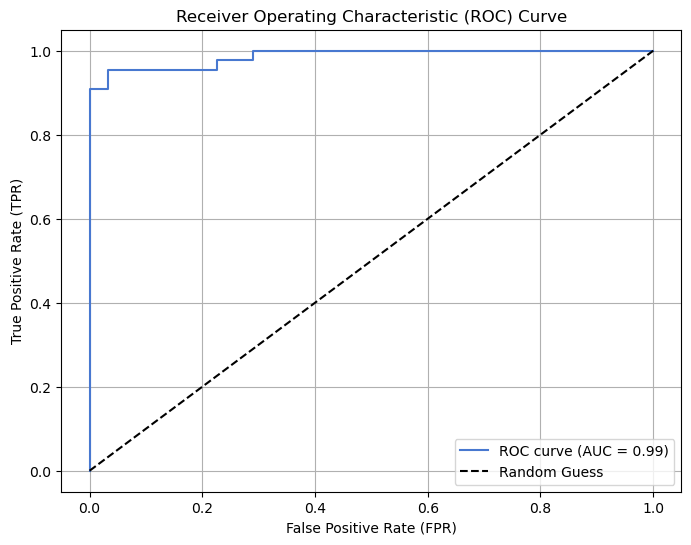

In [109]:
y_prob = model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(Y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

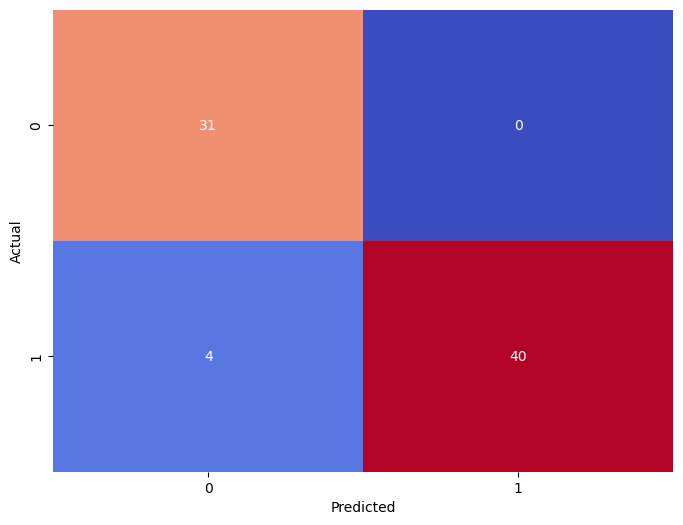

In [110]:
# Confusion Matrix

cm = confusion_matrix(Y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 2. Decisison Tree

In [111]:
dc_pred_test = dt_model1.predict(X_test)

In [112]:
# Classification report

print(classification_report(Y_test, dc_pred_test ))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        31
           1       1.00      0.93      0.96        44

    accuracy                           0.96        75
   macro avg       0.96      0.97      0.96        75
weighted avg       0.96      0.96      0.96        75



In [113]:
# Accuracy, Precision, Recall & F1 score

print("Accuracy:",metrics.accuracy_score(Y_test, dc_pred_test))
print("Precision:",metrics.precision_score(Y_test, dc_pred_test))
print("Recall:",metrics.recall_score(Y_test, dc_pred_test))
print("F1 Score:",metrics.f1_score(Y_test, dc_pred_test))

Accuracy: 0.96
Precision: 1.0
Recall: 0.9318181818181818
F1 Score: 0.9647058823529412


In [114]:
# AUC Score

logit_roc_auc = roc_auc_score(Y_test, dc_pred_test)
logit_roc_auc

0.9659090909090908

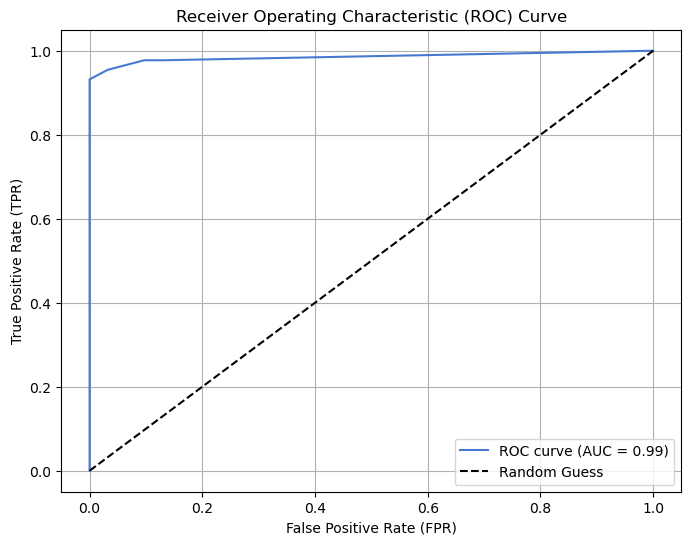

In [115]:
y_prob = dt_model1.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(Y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

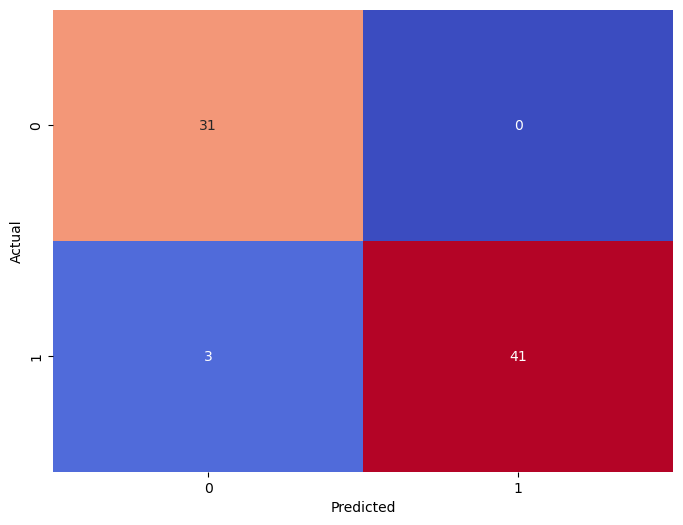

In [116]:
# Confusion Matrix

cm = confusion_matrix(Y_test, dc_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 3. KNN

In [117]:
knn_pred_test = knn_model.predict(X_test)

In [118]:
# Classification report

print(classification_report(Y_test, knn_pred_test ))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        31
           1       0.95      0.91      0.93        44

    accuracy                           0.92        75
   macro avg       0.92      0.92      0.92        75
weighted avg       0.92      0.92      0.92        75



In [119]:
# Accuracy, Precision, Recall & F1 score

print("Accuracy:",metrics.accuracy_score(Y_test, knn_pred_test))
print("Precision:",metrics.precision_score(Y_test, knn_pred_test))
print("Recall:",metrics.recall_score(Y_test, knn_pred_test))
print("F1 Score:",metrics.f1_score(Y_test, knn_pred_test))

Accuracy: 0.92
Precision: 0.9523809523809523
Recall: 0.9090909090909091
F1 Score: 0.9302325581395349


In [120]:
# AUC Score

logit_roc_auc = roc_auc_score(Y_test, knn_pred_test)
logit_roc_auc

0.9222873900293256

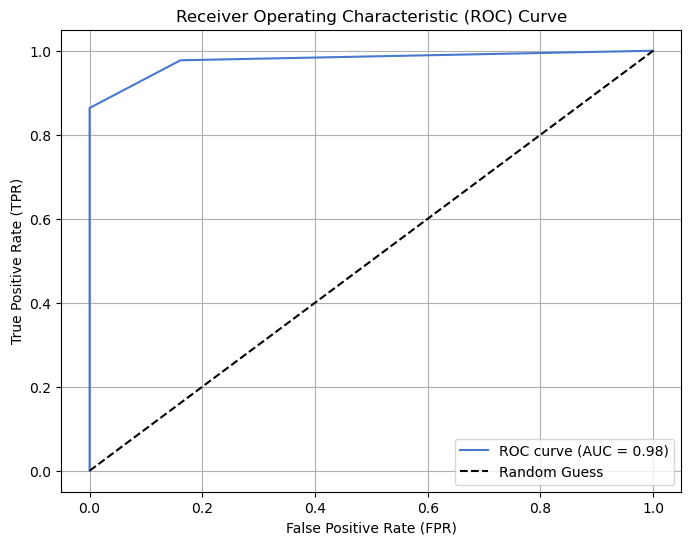

In [121]:
y_prob = knn_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(Y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

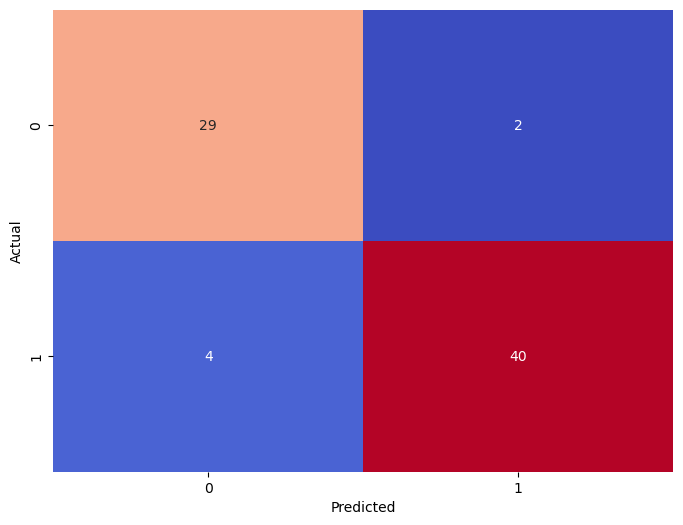

In [122]:
# Confusion Matrix

cm = confusion_matrix(Y_test, knn_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. Random Forest

In [138]:
rf_pred_test = rf_model.predict(X_test)

In [139]:
# Classification report

print(classification_report(Y_test, rf_pred_test ))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        31
           1       1.00      0.95      0.98        44

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.97      0.97      0.97        75



In [140]:
# Accuracy, Precision, Recall & F1 score

print("Accuracy:",metrics.accuracy_score(Y_test, rf_pred_test))
print("Precision:",metrics.precision_score(Y_test, rf_pred_test))
print("Recall:",metrics.recall_score(Y_test, rf_pred_test))
print("F1 Score:",metrics.f1_score(Y_test, rf_pred_test))

Accuracy: 0.9733333333333334
Precision: 1.0
Recall: 0.9545454545454546
F1 Score: 0.9767441860465117


In [141]:
# AUC Score

logit_roc_auc = roc_auc_score(Y_test, rf_pred_test)
logit_roc_auc

0.9772727272727273

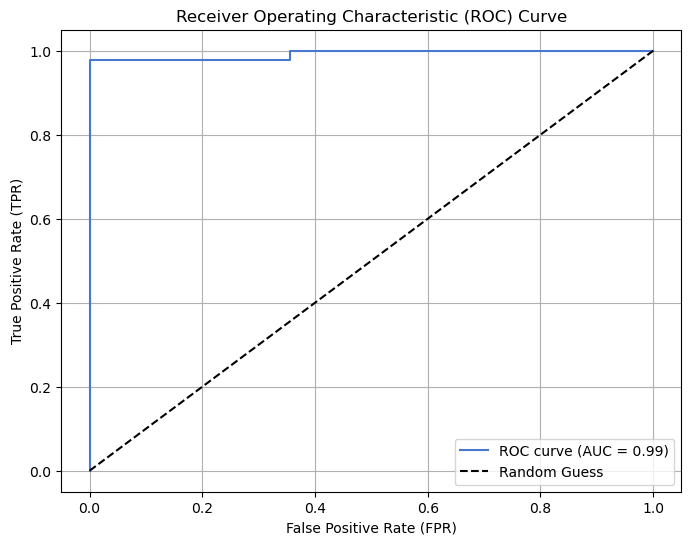

In [142]:
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(Y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

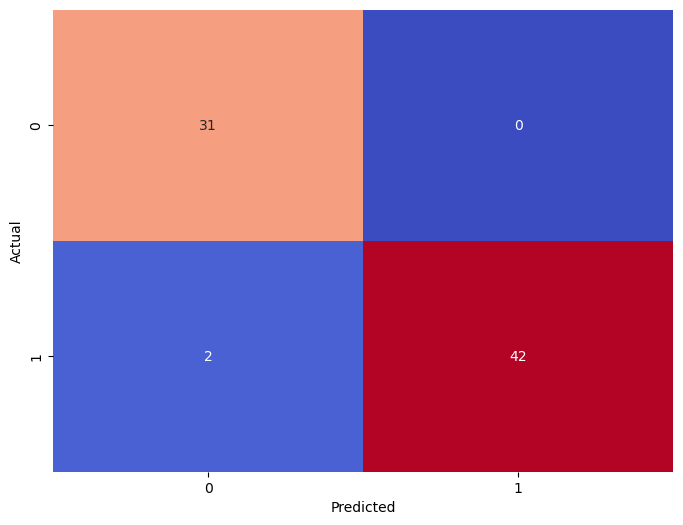

In [143]:
# Confusion Matrix

cm = confusion_matrix(Y_test, rf_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 5. Naive Bayes

In [144]:
gnb_pred_test = gnb_model.predict(X_test)

In [145]:
# Classification report

print(classification_report(Y_test, gnb_pred_test ))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        31
           1       1.00      0.91      0.95        44

    accuracy                           0.95        75
   macro avg       0.94      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



In [146]:
# Accuracy, Precision, Recall & F1 score

print("Accuracy:",metrics.accuracy_score(Y_test, gnb_pred_test))
print("Precision:",metrics.precision_score(Y_test, gnb_pred_test))
print("Recall:",metrics.recall_score(Y_test, gnb_pred_test))
print("F1 Score:",metrics.f1_score(Y_test, gnb_pred_test))

Accuracy: 0.9466666666666667
Precision: 1.0
Recall: 0.9090909090909091
F1 Score: 0.9523809523809523


In [147]:
# AUC Score

logit_roc_auc = roc_auc_score(Y_test, gnb_pred_test)
logit_roc_auc

0.9545454545454546

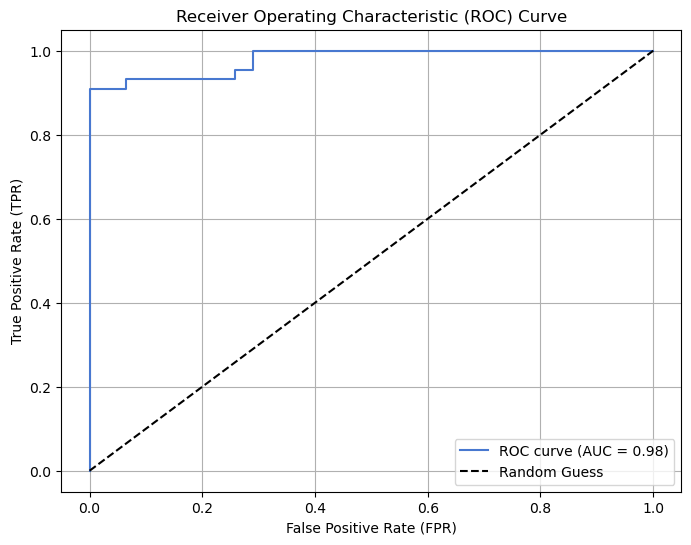

In [148]:
y_prob = gnb_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(Y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

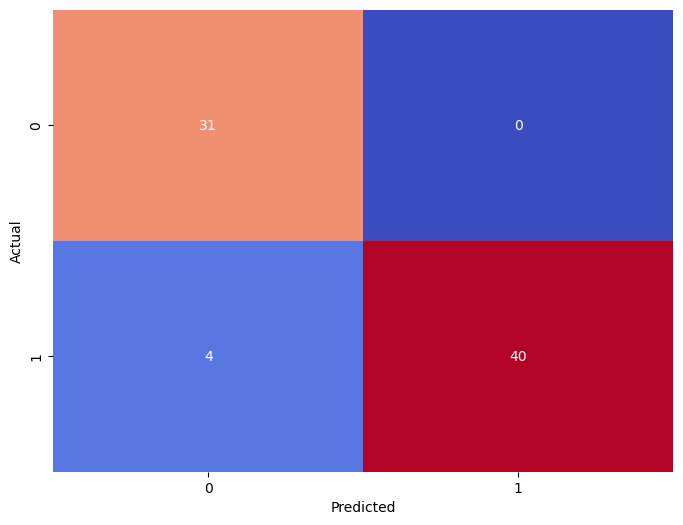

In [149]:
# Confusion Matrix

cm = confusion_matrix(Y_test, gnb_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. Support Vector Machine

In [150]:
svm_poly_pred_test = svm_poly.predict(X_test)

In [151]:
# Classification report

print(classification_report(Y_test, svm_poly_pred_test ))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92        31
           1       0.98      0.91      0.94        44

    accuracy                           0.93        75
   macro avg       0.93      0.94      0.93        75
weighted avg       0.94      0.93      0.93        75



In [152]:
# Accuracy, Precision, Recall & F1 score

print("Accuracy:",metrics.accuracy_score(Y_test, svm_poly_pred_test))
print("Precision:",metrics.precision_score(Y_test, svm_poly_pred_test))
print("Recall:",metrics.recall_score(Y_test, svm_poly_pred_test))
print("F1 Score:",metrics.f1_score(Y_test, svm_poly_pred_test))

Accuracy: 0.9333333333333333
Precision: 0.975609756097561
Recall: 0.9090909090909091
F1 Score: 0.9411764705882352


In [153]:
# AUC Score

logit_roc_auc = roc_auc_score(Y_test, svm_poly_pred_test)
logit_roc_auc

0.9384164222873901

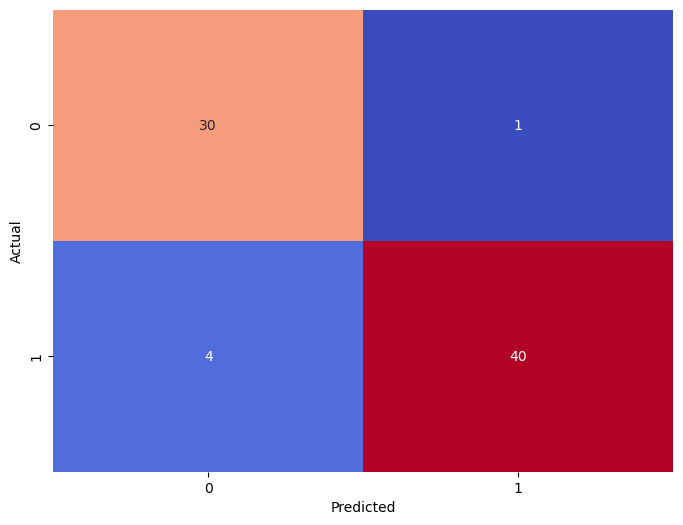

In [154]:
# Confusion Matrix

cm = confusion_matrix(Y_test, svm_poly_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 7. XGBoost

In [155]:
xg_pred_test = xg_model.predict(X_test)

In [156]:
# Classification report

print(classification_report(Y_test, xg_pred_test ))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        31
           1       0.95      0.95      0.95        44

    accuracy                           0.95        75
   macro avg       0.95      0.95      0.95        75
weighted avg       0.95      0.95      0.95        75



In [157]:
# Accuracy, Precision, Recall & F1 score

print("Accuracy:",metrics.accuracy_score(Y_test, xg_pred_test))
print("Precision:",metrics.precision_score(Y_test, xg_pred_test))
print("Recall:",metrics.recall_score(Y_test, xg_pred_test))
print("F1 Score:",metrics.f1_score(Y_test, xg_pred_test))

Accuracy: 0.9466666666666667
Precision: 0.9545454545454546
Recall: 0.9545454545454546
F1 Score: 0.9545454545454546


In [158]:
# AUC Score

logit_roc_auc = roc_auc_score(Y_test, xg_pred_test)
logit_roc_auc

0.9450146627565983

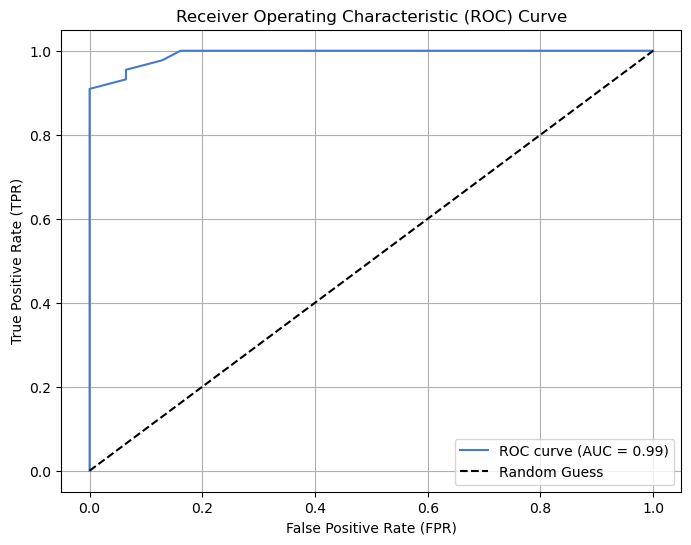

In [159]:
y_prob = xg_model.predict_proba(X_test)[:, 1]  # Probability of positive class

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(Y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

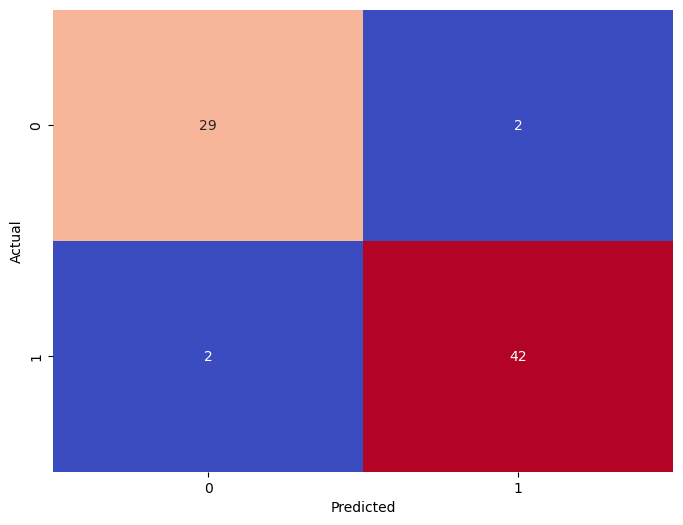

In [160]:
# Confusion Matrix

cm = confusion_matrix(Y_test, xg_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="coolwarm", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Model Performance

In [161]:
results = pd.DataFrame()
results['Algorithm'] = ['LogisticReg','DecisionTree','KNN','RandomForest','NaiveBayes','SVM','XGBoost']
results['Train_Accuracy'] = [0.93,0.96,0.94,0.96,0.90,0.94,0.93]
results['Test_Accuracy'] = [0.94,0.96,0.92,0.97,0.94,0.93,0.94]
results['Precision'] = [1.00,1.00,0.95,1.00,1.00,0.97,0.95]
results['Recall'] = [0.90,0.93,0.90,0.95,0.90,0.90,0.95]
results['F1 Score'] = [0.95,0.96,0.93,0.97,0.95,0.94,0.95]
results['AUC-Score'] = [0.95,0.96,0.92,0.97,0.95,0.93,0.94]

In [162]:
results

,Algorithm,Train_Accuracy,Test_Accuracy,Precision,Recall,F1 Score,AUC-Score
0,LogisticReg,0.93,0.94,1.00,0.90,0.95,0.95
1,DecisionTree,0.96,0.96,1.00,0.93,0.96,0.96
2,KNN,0.94,0.92,0.95,0.90,0.93,0.92
3,RandomForest,0.96,0.97,1.00,0.95,0.97,0.97
4,NaiveBayes,0.90,0.94,1.00,0.90,0.95,0.95
5,SVM,0.94,0.93,0.97,0.90,0.94,0.93
6,XGBoost,0.93,0.94,0.95,0.95,0.95,0.94


# So according to the results Decision tree and Random forest are the best performers.

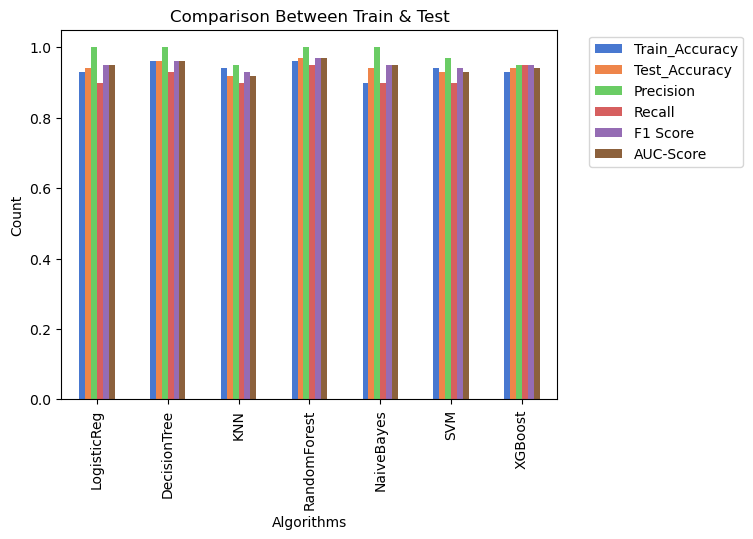

In [163]:
results.plot(
    x="Algorithm", y=["Train_Accuracy", "Test_Accuracy","Precision","Recall","F1 Score","AUC-Score"], kind="bar")
plt.title("Comparison Between Train & Test")
plt.xlabel("Algorithms")
plt.ylabel("Count")
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')

# Saving the trained model

In [164]:
import pickle

In [166]:
filename = 'decision_tree.sav'
pickle.dump(dt_model1, open(filename, 'wb'))

In [167]:
loaded_model = pickle.load(open('decision_tree.sav', 'rb'))

In [168]:
result = loaded_model.score(X, Y)
print(result)

0.964
